In [17]:
import cirq

In [18]:
import numpy as np


In [19]:
def grover_circuit (num_qubits):
    # Create qubits
    qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
    
    # Create a quantum circuit
    circuit = cirq.Circuit()
    
    # Initialize qubits to superposition state
    circuit.append(cirq.H.on_each(*qubits))
    
    # Oracle to mark the target state
    target_state = [1] * num_qubits # Target state is |11...1>
    oracle = cirq.Z.controlled(num_qubits - 1)
    circuit.append(oracle(*qubits))
    
    # Grover alg. diffusion operator (inversion about the mean)
    circuit.append(cirq.H.on_each(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.Z.controlled(num_qubits - 1)(*qubits))
    circuit.append(cirq.X.on_each(*qubits))
    circuit.append(cirq.H.on_each(*qubits))
    
    # Add measurement
    circuit.append([cirq.measure(qubit, key=f'q{i}') for i, qubit in enumerate(qubits)])
    
    return circuit, qubits

In [22]:
# Number of qubits
num_qubits = 3

# Create the Grover circuit
circuit, qubits = grover_circuit(num_qubits)

# Simulate the circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

# Get the measurement results
keys = [f'q{i}' for i in range(num_qubits)]
counts = result.multi_measurement_histogram(keys=keys)

# Convert the results to a readable format
readable_counts = {"".join(str(bit) for bit in reversed(state)): count for state, count in counts.items()}

# Print the results
print("Measurement Results:")
for state, count in readable_counts.items():
    print(f"State {state}: {count} times")

Measurement Results:
State 101: 26 times
State 111: 790 times
State 100: 40 times
State 011: 27 times
State 000: 37 times
State 010: 27 times
State 110: 23 times
State 001: 30 times


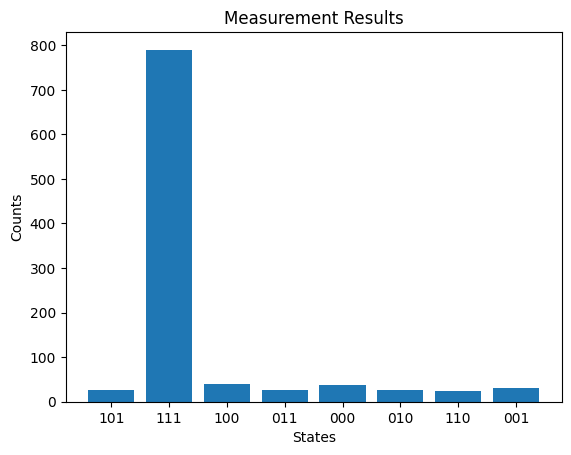

In [23]:
# Plot the results
import matplotlib.pyplot as plt

states = list(readable_counts.keys())
values = list(readable_counts.values())

plt.bar(states, values)
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Measurement Results')
plt.show()

In [35]:
from cirq.contrib.svg import SVGCircuit
from IPython.display import display

# Draw the circuit as a text
print("\nGrover Circuit:")
print(circuit)
circuit_diagram = circuit.to_text_diagram(transpose=True)
print(circuit_diagram)

# Save the circuit diagram to a file
with open('exports/grover_circuit.txt', 'w', encoding='utf-8') as f:
    f.write(circuit_diagram)


Grover Circuit:
0: ───H───@───H───X───@───X───H───M('q0')───
          │           │
1: ───H───@───H───X───@───X───H───M('q1')───
          │           │
2: ───H───@───H───X───@───X───H───M('q2')───
0       1       2
│       │       │
H       H       H
│       │       │
@───────@───────@
│       │       │
H       H       H
│       │       │
X       X       X
│       │       │
@───────@───────@
│       │       │
X       X       X
│       │       │
H       H       H
│       │       │
M('q0') M('q1') M('q2')
│       │       │


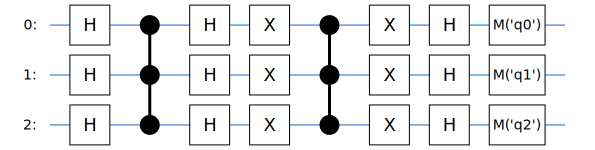

In [37]:
# Draw the circuit as SVG and display it
svg_circuit = SVGCircuit(circuit)
display(svg_circuit)

# Save the circuit diagram as SVG
with open("exports/grover_circuit.svg", "w", encoding='utf-8') as file:
    file.write(str(svg_circuit))